# Installation

In [6]:
%%bash
cat install.sh

virtualenv -p python3.5 venv
venv/bin/pip install --upgrade pip
venv/bin/pip install jupyter
venv/bin/pip install matplotlib


# We can code in python (and other languages)

In [2]:
mylist = [1,1,2,4,8]
print(mylist)

[1, 1, 2, 4, 8]


Other languages are available via additional kernels (https://github.com/jupyter/jupyter/wiki/Jupyter-kernels).

# The markdown cell

* We can use markdown here

## Code highlighting and tables (github flavoured markdown):

```python
print "Hello World"
```

```javascript
console.log("Hello World")
```

The table:

| This | is   |
|------|------|
|   a  | table|

## And we can insert links to local files

<img src="./images/python-logo.png" />

## Markdown allows direct HTML snippets too

The `strong` text: <strong>Text</strong>

# Other information and links

Notebook documentation: http://jupyter-notebook.readthedocs.io/en/latest/notebook.html

Notebook UI can be extended with JavaScript, see http://jupyter-notebook.readthedocs.io/en/latest/examples/Notebook/JavaScript%20Notebook%20Extensions.html

Additional languages are supported by kernels: https://github.com/jupyter/jupyter/wiki/Jupyter-kernels

A gallery of interesting Jupyter Notebooks: https://github.com/jupyter/jupyter/wiki/A-gallery-of-interesting-Jupyter-Notebooks

How to render images, HTML, JavaScript, etc from python code: https://nbviewer.jupyter.org/github/ipython/ipython/blob/master/examples/IPython%20Kernel/Rich%20Output.ipynb and https://nbviewer.jupyter.org/github/ipython/ipython/blob/master/examples/IPython%20Kernel/Custom%20Display%20Logic.ipynb

# Math

* We can also use LaTeX formulas (via MathJax) $e^{i\pi} + 1 = 0$
 * Inline formula is delimeted with single `$`
 * To use formula on it's own line, use double `$$`

$$e^x=\sum_{i=0}^\infty \frac{1}{i!}x^i$$

More examples of formulas: http://jupyter-notebook.readthedocs.io/en/latest/examples/Notebook/Typesetting%20Equations.html

Formulas syntax and examples: https://matplotlib.org/tutorials/text/mathtext.html#sphx-glr-tutorials-text-mathtext-py

List of math symbols (with LaTeX representations): https://en.wikipedia.org/wiki/List_of_mathematical_symbols#Letter-based_symbols

# Using other interpreters

Below is the example of running `bash`, see aslo https://nbviewer.jupyter.org/github/ipython/ipython/blob/master/examples/IPython%20Kernel/Cell%20Magics.ipynb and https://nbviewer.jupyter.org/github/ipython/ipython/blob/master/examples/IPython%20Kernel/Script%20Magics.ipynb

In [5]:
%%bash
echo "hi, $BASH stdout"
echo "hello, stderr" >&2

hi, /bin/bash stdout


hello, stderr


# Using External JavaScript Library

See: https://nbviewer.jupyter.org/github/ipython/ipython/blob/master/examples/IPython%20Kernel/Custom%20Display%20Logic.ipynb#More-complex-display-with-_ipython_display_

In [1]:
import json
import uuid
from IPython.display import display_javascript, display_html, display

class FlotPlot(object):
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.uuid = str(uuid.uuid4())
    
    def _ipython_display_(self):
        json_data = json.dumps(list(zip(self.x, self.y)))
        display_html('<div id="{}" style="height: 300px; width:80%;"></div>'.format(self.uuid),
            raw=True
        )
        display_javascript("""
        // we can use external link
        // require(["//cdnjs.cloudflare.com/ajax/libs/flot/0.8.2/jquery.flot.min.js"], function() {
        // or local file
        require(["js/jquery.flot.min.js"], function() {
          var line = JSON.parse("%s");
          console.log(line);
          $.plot("#%s", [line]);
        });
        """ % (json_data, self.uuid), raw=True)

In [2]:
import numpy as np
x = np.linspace(0,10)
y = np.sin(x)
FlotPlot(x, np.sin(x))

# Plotting with Matplotlib

See: https://nbviewer.jupyter.org/github/ipython/ipython/blob/master/examples/IPython%20Kernel/Plotting%20in%20the%20Notebook.ipynb

In [3]:
# run the %matplotlib magic command to enable plotting in the current Notebook
%matplotlib inline

<IPython.core.display.Javascript object>


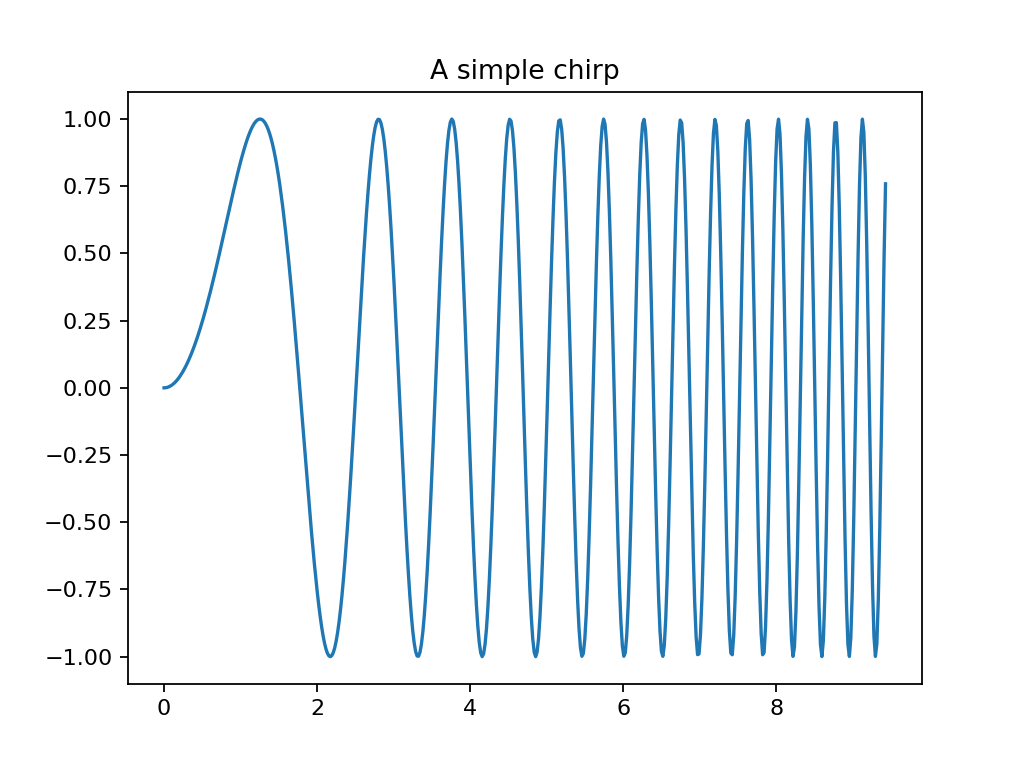

In [7]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 3*np.pi, 500)
plt.plot(x, np.sin(x**2))
plt.title('A simple chirp');

Using `%load http://matplotlib.org/mpl_examples/showcase/integral_demo.py` magic we can load examples by url:

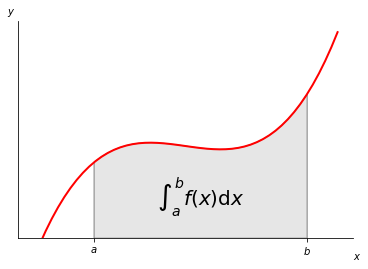

In [8]:
# %load http://matplotlib.org/mpl_examples/showcase/integral_demo.py
"""
Plot demonstrating the integral as the area under a curve.

Although this is a simple example, it demonstrates some important tweaks:

    * A simple line plot with custom color and line width.
    * A shaded region created using a Polygon patch.
    * A text label with mathtext rendering.
    * figtext calls to label the x- and y-axes.
    * Use of axis spines to hide the top and right spines.
    * Custom tick placement and labels.
"""
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon


def func(x):
    return (x - 3) * (x - 5) * (x - 7) + 85


a, b = 2, 9  # integral limits
x = np.linspace(0, 10)
y = func(x)

fig, ax = plt.subplots()
plt.plot(x, y, 'r', linewidth=2)
plt.ylim(ymin=0)

# Make the shaded region
ix = np.linspace(a, b)
iy = func(ix)
verts = [(a, 0)] + list(zip(ix, iy)) + [(b, 0)]
poly = Polygon(verts, facecolor='0.9', edgecolor='0.5')
ax.add_patch(poly)

plt.text(0.5 * (a + b), 30, r"$\int_a^b f(x)\mathrm{d}x$",
         horizontalalignment='center', fontsize=20)

plt.figtext(0.9, 0.05, '$x$')
plt.figtext(0.1, 0.9, '$y$')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')

ax.set_xticks((a, b))
ax.set_xticklabels(('$a$', '$b$'))
ax.set_yticks([])

plt.show()


And using the `%matplotlib notebook` magic command, we can have the interactive figure (re-run the example to see the controls for the figure).

In [8]:
%matplotlib notebook

<IPython.core.display.Javascript object>


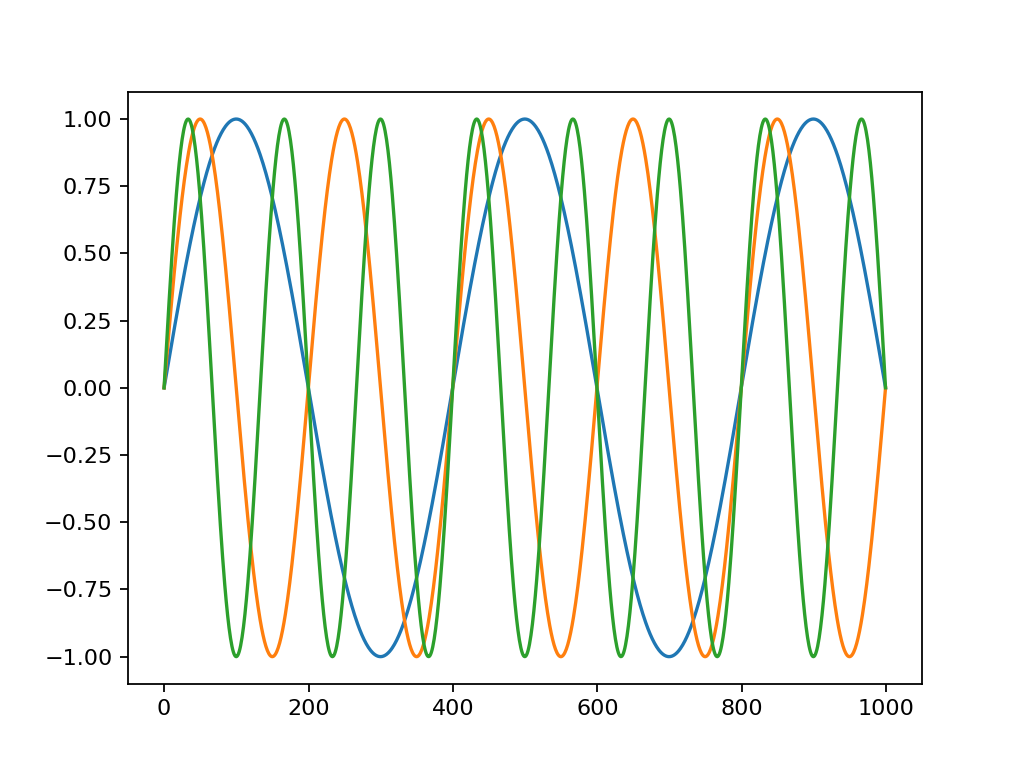

In [10]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure()
x = np.linspace(0, 5 * np.pi, 1000)
for n in range(1, 4):
    plt.plot(np.sin(n * x))
plt.show()

# Capture the Output

Below we capture the output and then print it (also it shows that we can import the external local module).
We can use the same to run local bash script or command and get its output.

See also: https://nbviewer.jupyter.org/github/ipython/ipython/blob/master/examples/IPython%20Kernel/Capturing%20Output.ipynb

In [1]:
%%capture output
from mylib import mymodule

mymodule.main()

In [2]:
print(output)

Hello Module!

